# All Classifiers in Machine Learning - Step by Step

1. Decision Tree
2. Random Forest
3. Naive Bayes
4. Gradient Boosting
5. K-Nearest Neighbor
6. Logistic Regression
7. Support Vector Machine(SVM)

#### Import the neccessary modules

In [131]:
import pandas as pd
import numpy as np
import seaborn as sb

#### Read the dataset into a dataframe

In [132]:
df = pd.read_csv('D:/DATASETS/titanic.csv', sep='\t', engine='python')

In [133]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Drop some columns which is not relevant to the analysis (they are not numeric)

In [134]:
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_to_drop, axis=1)

In [135]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


#### Check for null values 

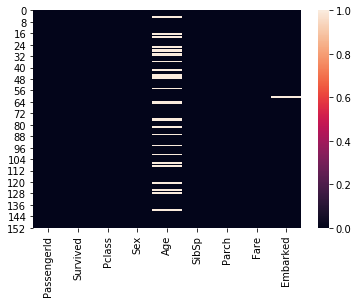

In [136]:
sb.heatmap(df.isnull())

#### To replace missing values with interpolated values

In [137]:
df['Age'] = df['Age'].interpolate()

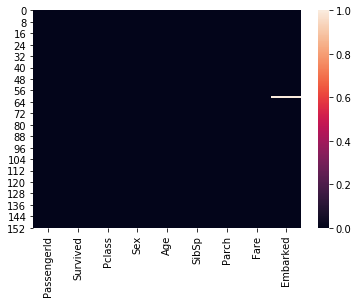

In [138]:
sb.heatmap(df.isnull())

#### Drop rows with missing values

In [139]:
df = df.dropna()

In [140]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 9 columns):
PassengerId    155 non-null int64
Survived       155 non-null int64
Pclass         155 non-null int64
Sex            155 non-null object
Age            155 non-null float64
SibSp          155 non-null int64
Parch          155 non-null int64
Fare           155 non-null float64
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 12.1+ KB


#### Convert Categorical Columns to binary

###### To do that, create dummy columns for the columns you want to convert, concatenate it with the dataframe, then drop the existinc columns

In [142]:
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

In [143]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,44.5,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [144]:
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)

In [145]:
#Check that the columns were concatenated
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


In [146]:
# Drop the redundant columns thus converted
df = df.drop(['Sex','Embarked'],axis=1)

In [147]:
# Seperate the dataframe into X and y data
X = df.values
y = df['Survived'].values

In [148]:
# Delete the Survived column from X
X = np.delete(X,1,axis=1)

### Split the Dataset

In [149]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3)

### Build Decision Tree Classifier

In [150]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5) # Build
dt_clf.fit(X_train, y_train) # Train


dt_clf.score(X_test, y_test) # Make prediction

y_pred = dt_clf.predict(X_test)
dt_clf.score(X_test, y_test)

0.7659574468085106

In [151]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[22,  5],
       [ 6, 14]], dtype=int64)

### Build Random Forest Classifier

In [152]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.8297872340425532

### Build Gradient Boosting Classifier

In [153]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.7659574468085106

### Tune the GB Classifier

In [154]:
# Let's  tune this Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=40)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.7446808510638298

### Build a Naive Bayes Classifier

In [155]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_clf.score(X_test, y_test)

0.7021276595744681

### Build a K-Nearest Neighbor Classifier

In [156]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.48936170212765956

### Build a Logistic Regression Classifier

In [157]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7659574468085106

### Build an SVM Classifier

In [130]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True)
sv_clf.fit(X_test, y_test)
sv_clf.score(X_test, y_test)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

### Prediction Probabilities

In [103]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_clf.predict_proba(X_test)
nb_probs = nb_clf.predict_proba(X_test)
dt_probs = dt_clf.predict_proba(X_test)
gb_probs = gb_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
lr_probs = lr_clf.predict_proba(X_test)
sv_probs = sv_clf.predict_proba(X_test)

##### Probabilities for the positive outcome is kept.

In [104]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]
gb_probs = gb_probs[:, 1]
knn_probs = knn_probs[:, 1]
lr_probs = lr_probs[:, 1]
sv_probs = sv_probs[:, 1]

### Compute the AUROC Values

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
sv_auc = roc_auc_score(y_test, sv_probs)

### Display the AUROC Scores

In [106]:
print("Random Prediction: AUC = %.3f" %(r_auc))
print("Random Forest: AUC = %.3f" %(rf_auc))
print("Naive Bayes: AUC = %.3f" %(nb_auc))
print("Decistion Tree Prediction: AUC = %.3f" %(dt_auc))
print("Gradient Boosting Prediction: AUC = %.3f" %(gb_auc))
print("KNearest Neighbors Prediction: AUC = %.3f" %(knn_auc))
print("Logistic Regresssion: AUC = %.3f" %(lr_auc))
print("Support Vector Machine: AUC = %.3f" %(sv_auc))

Random Prediction: AUROC = 0.500
Random Forest: AUROC = 0.994
Naive Bayes: AUROC = 0.817
Decistion Tree Prediction: AUROC = 0.919
Gradient Boosting Prediction: AUROC = 0.787
KNearest Neighbors Prediction: AUROC = 0.615
Logistic Regresssion: AUROC = 0.856
Support Vector Machine: AUROC = 0.269


### Calculate the ROC Curve

In [107]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
sv_fpr, sv_tpr, _ = roc_curve(y_test, sv_probs)

### Plot the ROC Curve

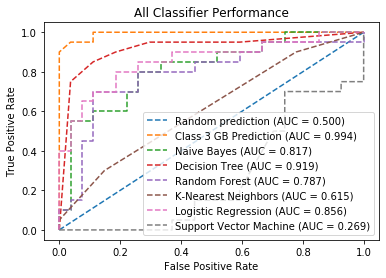

In [162]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,7))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' %r_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Class 3 GB Prediction (AUC = %0.3f)' %rf_auc)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUC = %0.3f)' %nb_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree (AUC = %0.3f)' %dt_auc)
plt.plot(gb_fpr, gb_tpr, linestyle='--', label='Random Forest (AUC = %0.3f)' %gb_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='K-Nearest Neighbors (AUC = %0.3f)' %knn_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression (AUC = %0.3f)' %lr_auc)
plt.plot(sv_fpr, sv_tpr, linestyle='--', label='Support Vector Machine (AUC = %0.3f)' %sv_auc)

#Title
plt.title('All Classifier Performance')

#Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Show Legend
plt.legend()
plt.show()